## General instructions

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel/runtime** (Colab: in the menubar, select *Runtime*$\rightarrow$*Factory Reset Runtime*; Jupyter: in the menubar, select *Kernel*$\rightarrow$*Restart*) and then **run all cells** (Colab: in the menubar, select *Runtime*$\rightarrow$*Run all*; Jupyter: in the menubar, select *Cell*$\rightarrow$*Run All*).

Make sure you fill in any place that says `YOUR CODE HERE` or `"YOUR ANSWER HERE"`, as well as the list of the group members in the following cell.

Enter here the *Group Name* and the list of *Group Members*.

`Doi eletronics`

`Burco Lorenzo, Persello Riccardo`

In order to be able to have an evaluation DO NOT delete/cut the cells with code and answers. Once you have finished you can downolad the notebook (Colab: in the menubar, select *File*$\rightarrow$*Download .ipynb*; Jupyter: in the menubar, select *File*$\rightarrow$*Download as*$\rightarrow$*Notebook (.ipynb)*) and upload as an assignment on the e-learning platform.

The following cell will load the Google Drive extension for the current notebook, when the variable `MOUNT` is `True`. This allow you to mount the Google Drive filesystem for file persistence. The mountpoint will be `/content/gdrive`.
Furthermore, it will set the `PATH` variable, from now on, so that if you have to refer to external files you could do that by writing:

```python
os.path.join(PATH, filename)
```

This will append the filename after the specific PATH.

In [87]:
import os
MOUNT = False
if 'google.colab' in str(get_ipython()) and MOUNT:
    from google.colab import drive
    drive.mount('/content/gdrive')
    PATH = '/content/gdrive/MyDrive'
else:
    PATH = '.'

# Important warning

**⚠️ avoid copying, removing or modifying test cells, if you do that your assignment might be graded wrongly ⚠️**

---

# Exercise 1

Instantiate the following arrays:

$B = \begin{bmatrix} 1 & 2 & -3 \\ 3 & 4 & -1 \end{bmatrix}$, $A = \begin{bmatrix} 2 & -5 & 1 \\ 1 & 4 & 5 \\ 2 & - 1 & 6 \end{bmatrix}$, $y = \begin{bmatrix} 2 & -4 & 1 \end{bmatrix}$, $z = \begin{bmatrix} -15 \\ -8 \\ -22 \end{bmatrix}$. 

Try doing it using the different methods illustrated in the video lecture (i.e., lists / list of lists, reshaping, stacking, etc.).

In [88]:
import numpy as np
    
B = np.stack([[1, 2, -3], [3, 4, -1]], 0)
A = np.reshape([2, -5, 1, 1, 4, 5, 2, -1, 6], (3, 3))
y = np.array([2, -4, 1])
z = np.array([[-15], [-8], [-22]])

In [89]:
assert B.ndim == 2
assert B.shape == (2, 3)
assert all(B.flatten() == np.array([1, 2, -3, 3, 4, -1]))
assert B.dtype == np.int64

In [90]:
assert A.ndim == 2
assert A.shape == (3, 3)
assert all(A.flatten() == np.array([ 2, -5,  1,  1,  4,  5,  2, -1,  6]))
assert B.dtype == np.int64

In [91]:
assert y.ndim == 1
assert y.shape == (3,)
assert all(y[i] == [2, -4, 1][i] for i in range(y.shape[0]))
assert y.dtype == np.int64

In [92]:
assert z.ndim == 2
assert z.shape == (3, 1)
assert all(z[i] == [-15, -8, -22][i] for i in range(z.shape[0]))
assert z.dtype == np.int64

# Exercise 2

Write the `numpy` code  that calculates and stores the values of the following expressions:

* $v_0 = B \cdot A$
* $v_1 = A \cdot B^T$
* $v_2 = A \cdot y$
* $v_3 = y^T \cdot z$
* $v_4 = y \cdot z^T$
* $v_5 = A + 3 \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 1 \\ 0 & 0 & 2 \end{bmatrix} \cdot \begin{bmatrix} y \\ y \\ y \end{bmatrix}$

Where the multiplication has to be interpreted as the *matrix* multiplication (or *scalar product* in case of vectors) and is implemented through the `np.dot()` function. As for the matrix transpose it is not a function but an attribute of arrays whose name is `.T`. 

Notice that the matrix $\begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 1 \\ 0 & 0 & 2 \end{bmatrix}$ is nothing but the order 3 identity matrix with an additional 1 added in the last column.

Notice, also, that the $y \cdot z^T$ is an *outer* product, refer to the `numpy` documentation for finding how to compute it

In [93]:
v = [None] * 6 # v should store the results of each expression in v[i]

v[0] = B.dot(A)
v[1] = A.dot(B.T)
v[2] = A.dot(y)
v[3] = y.T.dot(z)
v[4] = np.outer(y, z)
v[5] = A + 3 * (np.eye(3, dtype=np.int64) + np.stack([np.zeros(3), np.zeros(3), np.ones(3)], 1).astype(np.int64)).dot(np.stack([y, y, y], 0))

In [94]:
for res in v:
    assert res.dtype == np.int64

In [95]:
assert np.all(v[0] == np.array([[-2,  6, -7], [ 8,  2, 17]]))

In [96]:
assert np.all(v[1] == np.array([[-11, -15], [ -6,  14], [-18,  -4]]))

In [97]:
assert np.all(v[2] == np.array([25, -9, 14])) 

In [98]:
assert np.all(v[3] == np.array([-20]))

In [99]:
assert np.all(v[4] == np.array([[-30, -16, -44], [ 60,  32,  88], [-15,  -8, -22]]),)

In [100]:
assert np.all(v[5] == np.array([[ 14, -29,   7], [ 13,  -20,  11],[ 14, -25,  12]]))

# Exercise 3

Using the `np.linalg` submodule of `numpy`, solve the equation $A x = y$, determining the array $x$.

In [101]:
x = np.linalg.solve(A, y)

In [102]:
np.testing.assert_almost_equal(x, np.array([-3.0 , -1.4137931, 0.93103448]))

## Exercise 4

The *power iteration* algorithm is a simple iterative scheme for computing the dominant (i.e., largest) *real-valued* eigenvector $b$ and eigenvalue $\mu$ of a diagonizable matrix. Given a square matrix $A$ the method is described by the following *recurrence relation*:

$$\bar{b}_{k+1} = \frac{A \; \bar{b}_k}{\|A \; \bar{b}_k\|}$$

With $\bar{b}_{0} = \mathbf{1}$

The recurrence relation for the eigenvalue is:

$$\mu_k = \frac{\bar{b}_k^{T} \; A \; \bar{b}_k}{\bar{b}_k^{T} \; \bar{b}_k}$$

Observe, that given that $\mu_k$ does not enter in the computation of $\bar{b}_{k+1}$, it can be computed directly at the end of the algorithm.

Write a Python function `power_iteration(A, iterations=100, precision=1E-15)`, using the `numpy` library that implements the *power iteration* algorithm. In particular the function should stop when the number of `iterations` has passed and should return a tuple (a pair) with the dominant eigenvalue and the corresponding unit eigenvector of $A$.
The argument `precision` is the approximation you allow for stopping the iterations earlier than when the overall number is expired.

In [103]:
import math

def power_iteration(A: np.ndarray, iterations=100, precision=1E-15):
    current_iteration = 1
    b = np.ones(A.shape[0])
    norm = np.linalg.norm(b)
    delta = math.inf
    while current_iteration < iterations and abs(delta) > precision:
        ab = A.dot(b)
        norm_next = np.linalg.norm(ab)
        b = ab / norm_next

        delta = norm_next - norm
        norm = norm_next
        current_iteration += 1

    mu = (b.T.dot(A).dot(b)) / (b.T.dot(b))
        
    return mu, b

In [104]:
import random

for _ in range(100):
    # creating a random matrix of size between 2 and 20
    n = random.randint(2, 20)
    A = np.random.random((n, n))
    A[0, 0] = 10 # this is needed to ensure that there is a large dominant eigenvalue
    reference_mu, reference_b = np.linalg.eig(A)
    i = np.argmax(reference_mu)
    reference_b, reference_mu = reference_b[i], reference_mu[i]
    mu, b = power_iteration(A)    
    np.testing.assert_almost_equal(mu, reference_mu, decimal=5)
    np.testing.assert_almost_equal(np.dot(A, b), mu * b, decimal=5)

# Particle Swarm Optimization

The Particle Swarm Optimization (PSO) is a nature inspired *population-based metaheuristic* optimization method for continuous multi-dimensional functions that is inspired by the behavior of bird flocks. It was initially proposed by Eberhart and Kennedy in 1995.

Given a function $F: \mathcal{S} \rightarrow \mathbb{R}, \mathcal{S} \subseteq \mathbb{R}^d$ to be (w.l.o.g.) minimized, the PSO generates a number of particles. Each individual particle $i$ represent a complete solution to the problem, that is a $d$-dimensional vector of real numbers, by means of its *position* $\bar{x}_{i}$. Moreover each particle has another $d$-dimensional velocity vector $\bar{v}_{i}$. Finally, each particle $i$ stores its best *personal* position $\bar{p}_i$ (with respect to the function to be optimized) and the *global* best position $\bar{g}^*$ among the best position of the individual particles (i.e., $\bar{g}^* = \arg\min_{\bar{p}_i} F(\bar{p}_i)$) is known.

The algorithm is an iterative one, namely, at each time iteration, a particle moves to a new position, by adjusting its velocity and its position (in this order), trying to bias the velocity vector toward a combination of *personal* and *global* best (see the picture).

![](pso.png)

The precise equations regulating the dynamics of each particles are as follows:

* $\bar{v}'_i = \phi \bar{v}_i + c_0 \cdot r_0 \cdot (\bar{p}_i - \bar{x}_i) + c_1 \cdot r_1 \cdot (\bar{g}^{*} - \bar{x}_i)$
* $\bar{x}'_i = \bar{x}_i + \bar{v}'_i$

Parameters $c_0$ and $c_1$ indicate the relative importance of personal and global best (meaningful values are 1.5 to 2, and 2 to 2.5, respectively), $r_0$ and $r_1$ are two uniform random numbers in the range $[0, 1]$. $\phi$ is instead an inertia, i.e., a multiplicative factor on previous velocity. Furthermore, usually an upper bound $v_{max}$ on maximum velocity is added (so that any velocity component above $v_{max}$ or below $-v_{max}$ will be trimmed to that value. Also if the particle goes out of the search space $\mathcal{S}$ it might be randomly reassigned or only the components out of bounds could be forced to be at the extremes of the space.

Once the new positions and velocities are computed for all the particles, the new *personal* best for each particle and, consequently, the *global* best for the whole swarm are updated if needed (i.e., if a new improving function value is determined). 


A termination criterion is expressed in terms of maximum time the global solution has not changed (`max_idle` iterations have expired).

The algorithm can be expressed in the following abstract scheme, where `n` is the size of the particle population:

```python
def pso(S, F, n, c, phi, v_max, precision=1E-7, max_idle=100):
    # set random positions and velocities, within S
    x, v = initialize_particles(n, S, v_max)
    # initialize best personal and global
    p = x
    g = best(p, F)
    old_g = g
    idle = 0
    
    while idle < max_idle:
        v = update_velocity(v, x, p, g, c, phi, v_max)
        x = update_position(v, x, S)        
        for i in range(x.shape[0]):
            if F(x[i]) < F(p[i]):
                # update the best personal position
                p[i] = x[i]
        # update the best global position
        g = best(p, F)
        if np.linalg.norm(g - old_g) < precision:
            idle += 1
        else:
            idle = 0
        old_g = g
    return g
```

It relies a number of functions that provide a strategy for the different aspects of the PSO scheme.

# Exercise 5

Define the function `initialize_particles(n, S, v_max)` that given a representation of the search space $\mathcal{S}$ in the form of a pair of $d$-dimensional arrays with the lower and upper bound for each dimension, returns a `n` uniform random positions and velocities represented as a pair of `numpy` $n \times d$ matrices (each row represents a particle).

An example of specification of the search space $\mathcal{S} = [-1, 1]^3$ is `(np.array([-1.0, -1.0, -1.0]), np.array([1.0, 1.0, 1.0]))`.

The `np.random.uniform()` function can be very helpful.

The outcome can be something like this:

```python
(array([[-0.37261481,  0.18677675, -0.00195651],
        [-0.41253898,  0.18312799,  0.76484598],
        [ 0.95310461, -0.44592388,  0.08003894]]),
 array([[-7.23464707,  5.22991506,  2.84575537],
        [ 8.81941877, -5.76708698,  6.5165774 ],
        [-9.8289967 ,  1.57905635,  2.21461532]]))
```

In [105]:
def initialize_particles(n, S, v_max):
    d = S[0].shape[0]
    return (
        np.random.uniform(S[0], S[1], (n, d)),
        np.random.uniform(S[0], S[1], (n, d)) * v_max
    )

In [106]:
for _ in range(100):
    n, v_max = random.randint(2, 10), random.uniform(0.1, 0.2)
    S = (-np.ones(n), np.ones(n))
    x, v = initialize_particles(n, S, v_max)
    assert np.all(-1.0 <= x) and np.all(x <= 1.0)
    assert np.all(-v_max <= v) and np.all(v <= v_max)

# Exercise 6
Write the function `best(p, F)` that returns the best particle among `p` with respect to the minimization of the function F. The function `np.apply_along_axis()` might be useful.

In [107]:
def best(p, F):    
    return p[np.argmin(np.apply_along_axis(F, 1, p))]

In [108]:
for _ in range(100):
    n, d = random.randint(10, 20), random.randint(3, 10)
    p = np.random.uniform(size=(n, d))
    r = best(p, lambda x: np.min(x))
    assert np.min(r) == np.min(p)

# Exercise 7

Define the functions `update_velocity()` and  `update_position()` according to the PSO dynamics.

In [109]:
def update_velocity(v: np.ndarray, x: np.ndarray, p: np.ndarray, g: np.ndarray, c: (float, float), phi: float, v_max: float) -> np.ndarray:
    particle_dim = v.shape[1]
    r = np.random.uniform(0, 1, 2)

    v_new = phi * v + c[0] * r[0] * (p - x) + c[1] * r[1] * (g - x)

    norm = np.linalg.norm(v_new, axis=1)

    scale_factor_generator = lambda norm: 1 if norm < v_max else v_max / abs(norm)
    scale_factor = np.tile(np.array([scale_factor_generator(n) for n in norm])[:, None], (1, particle_dim))
    
    return v_new * scale_factor


In [110]:
def update_position(v, x, S):
    return np.clip(x + v, S[0], S[1])

# Exercise 8

Providing all the values to the following `pso` scheme, define and find the minimum of the *Rosenbrock Function* $F(\bar{x}) = \sum_{i=1}^{d-1} 100(x_{i + 1} - x_{i}^2)^2 + (x_i - 1)^2$ in $\mathcal{S} = [-30.0, 30.0]^d$ and search for the minimum You can see the shape of the function in the case of $d = 2$ in the following graph.

The minimum is the $d$-dimensional $\mathbf{1}$ vector.

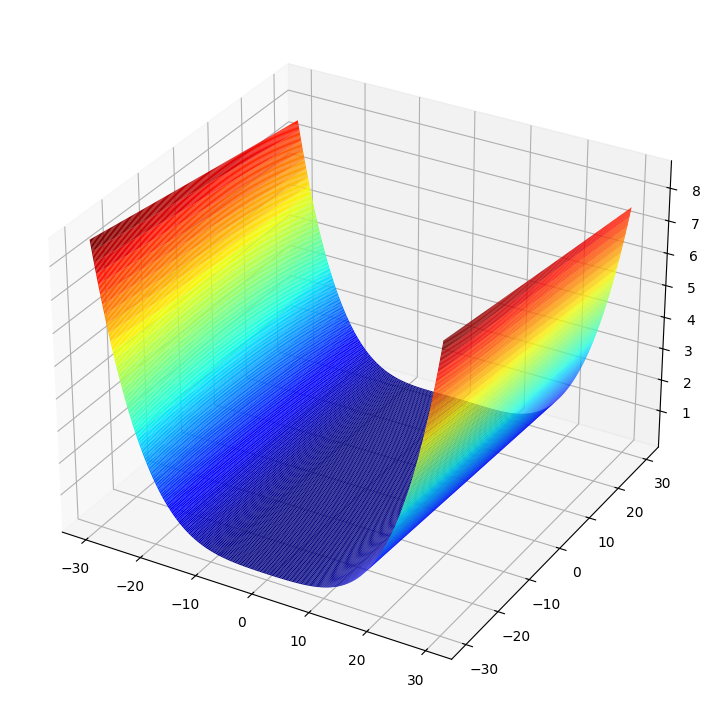

In [111]:
from matplotlib import cm  
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-30, 30, 200)    
Y = np.linspace(-30, 30, 200)    
X, Y = np.meshgrid(X, Y)

Z = (1.-X)**2 + 100.*(Y-X*X)**2

fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, \
  cstride=1, cmap=cm.jet)
    
plt.show()

In [112]:
def pso(S, F, n, c, phi, v_max, precision=1E-7, max_idle=100):
    # set random positions and velocities, within S
    x, v = initialize_particles(n, S, v_max)
    # initialize best personal and global
    p = x
    g = best(p, F)
    old_g = g
    idle = 0
    
    while idle < max_idle:
        v = update_velocity(v, x, p, g, c, phi, v_max)
        x = update_position(v, x, S)        
        for i in range(x.shape[0]):
            if F(x[i]) < F(p[i]):
                # update the best personal position
                p[i] = x[i]
        # update the best global position
        g = best(p, F)
        if np.linalg.norm(g - old_g) < precision:
            idle += 1
        else:
            idle = 0
        old_g = g
    return g

Define the Rosenbrock evaluation function `rosenbrock(x)`: it will take an array $x$ to be evaluated and returns a scalar with the function value according to the previous formula.

In [113]:
def rosenbrock(x: np.ndarray):
     d = x.shape[0]
     acc = 0

     for i in range(0, d - 1):
          acc += (100. * ((x[i + 1] - (x[i] ** 2)) ** 2)) + ((x[i] - 1.) ** 2)

     return acc

In [114]:
np.random.seed(0)
for d in range(2, 5):
    S = (-30.0 * np.ones(d), 30.0 * np.ones(d))
    res = pso(S, rosenbrock, 100, (2.0, 2.5), 0.7, 0.2)
    np.testing.assert_array_almost_equal(res, np.ones(d), decimal=5)
    print(f"Testing {d} dimensions OK")

Testing 2 dimensions OK
Testing 3 dimensions OK
Testing 4 dimensions OK


Equip the PSO to find the minimum of the following function, with $d = 6$ on $[0, 1]^6$.

$$f(x) = \frac{1}{899} \big( \sum_{i=1}^{6} x_i^2 2^i - 1745 \big)$$

In [117]:
def f(x: np.ndarray):
    d = x.shape[0]

    return (1/899) * np.sum([x[i - 1] ** 2 * 2 ** i - 1745 for i in range(1, d + 1)])

d = 6
S = (np.zeros(d), np.ones(d))
res = pso(S, f, 100, (2.0, 2.5), 0.7, 0.2)

print(res)

[0. 0. 0. 0. 0. 0.]
